## Uploading Data + Normalization

In [123]:
#uploading
with open("key_timings.log", "r") as f:
    tmng = []
    for _ in f:
        if _.strip():             
            tmng.append(float(_.strip())) 


In [124]:
#extracting last digs
last_digits = []
for t in tmng:
    fr_str = str(t).split(".")[1]  
    dig = fr_str[-4:]  

    last_digits.append(int(dig))


In [125]:
fl = [d / 9999 for d in last_digits]  


## Graph

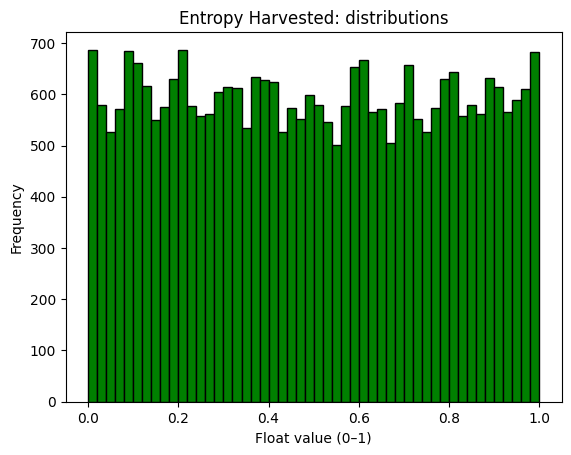

In [126]:
import matplotlib.pyplot as plt

plt.hist(fl, bins= 50, color='green', edgecolor='black')
plt.xlabel("Float value (0–1)")
plt.ylabel("Frequency")
plt.title("Entropy Harvested: distributions")
plt.show()


## Quantum Entanglement Experiment

In [127]:
with open("keystroke_floats.txt", "w") as f:
    for val in fl:
        f.write(f"{val}\n")


In [128]:
import math, random

g = 0

# load normalized floats from file
with open("keystroke_floats.txt") as f:
    fl = [float(line.strip()) for line in f if line.strip()]

#angles mimicry detectors == the axis it is measured v/s the real axis it collapses (usually taken z-axis)
a_ang = 0
b_ang = 90
diff = math.radians(a_ang - b_ang)
exp = math.cos(diff / 2) ** 2
print(f"Expected match: {exp * 100:.2f}%")

n = 1000

for i in range(1, 11):
    m = 0 #how many matches?

    for _ in range(n):
        if len(fl) < 2:
            print("Entropy insufficient.")
            break

        x, y = random.sample(fl, 2) #sry for using random here but uk, does it count? The novelty was that the data is random. 

        if x < exp:                 #so random is for the sake of generating dynamic output every run. 
                                    #Otherwise, you use up all the rand in a seq, so same path = same output
            a = b = 0 if y < 0.5 else 1
        else:
            a, b = (0, 1) if y < 0.5 else (1, 0)

        if a == b:
            m += 1

    pct = (m / n) * 100
    print(f"Run {i}: {pct:.2f}% match")
    g += pct

print(f"Avg: {g / 10:.2f}%")


Expected match: 50.00%
Run 1: 50.30% match
Run 2: 51.90% match
Run 3: 46.80% match
Run 4: 50.00% match
Run 5: 51.00% match
Run 6: 49.70% match
Run 7: 50.80% match
Run 8: 47.70% match
Run 9: 48.50% match
Run 10: 51.80% match
Avg: 49.85%
